Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


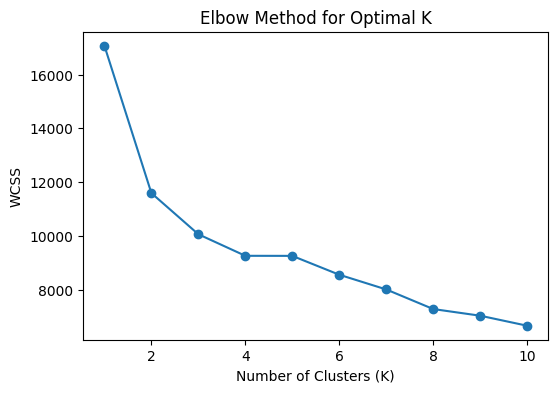

K-Means Silhouette Score: 0.3447344346611054


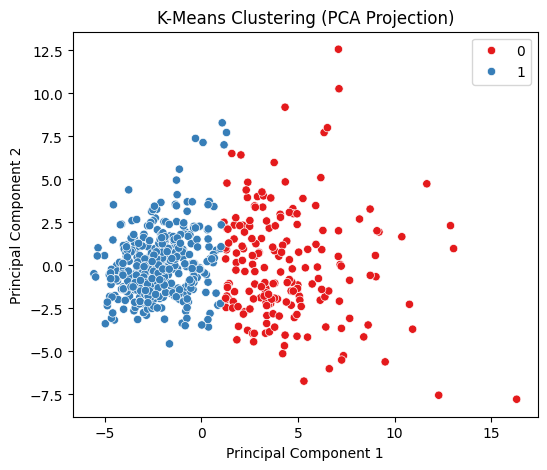

Hierarchical Clustering Silhouette Score: 0.33938477753669855


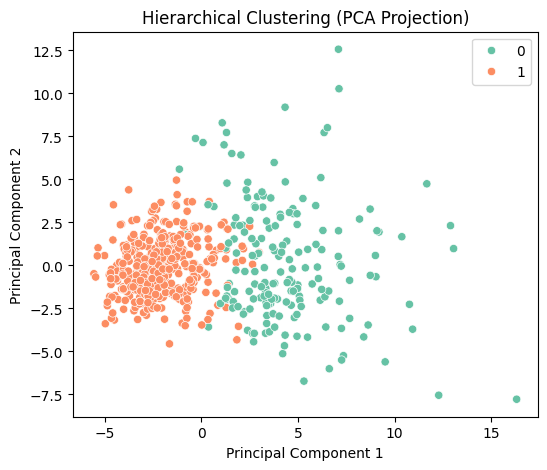

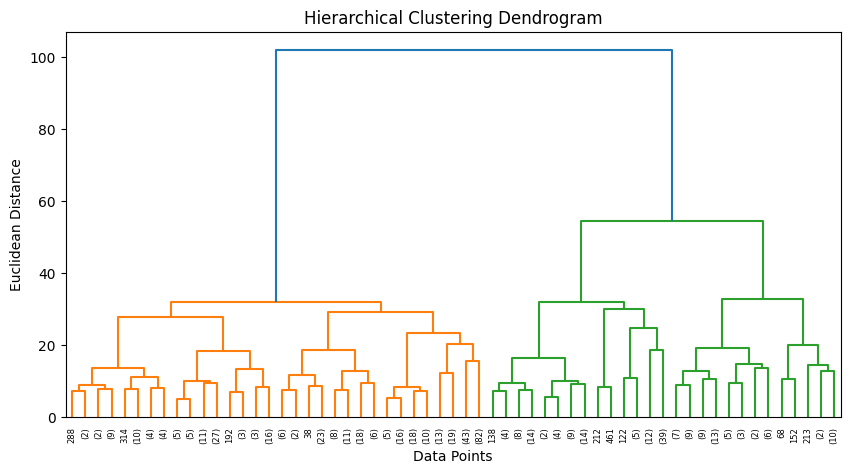

In [1]:
# ===============================
# K-Means & Hierarchical Clustering
# Breast Cancer Wisconsin Dataset
# ===============================

# Install KaggleHub (only needed once in Colab)
!pip install kagglehub

# Imports
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

# -------------------------------
# Load Dataset using KaggleHub
# -------------------------------
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
df = pd.read_csv(f"{path}/data.csv")

print("Dataset Shape:", df.shape)
display(df.head())

# -------------------------------
# Data Preprocessing
# -------------------------------
# Drop irrelevant columns
df_clean = df.drop(columns=["id", "diagnosis", "Unnamed: 32"], errors="ignore")

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# -------------------------------
# K-Means: Elbow Method
# -------------------------------
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# -------------------------------
# Apply K-Means (K=2)
# -------------------------------
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

# -------------------------------
# PCA for Visualization (2D)
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette="Set1")
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -------------------------------
# Hierarchical Clustering
# -------------------------------
hierarchical = AgglomerativeClustering(n_clusters=2, linkage="ward")
hier_labels = hierarchical.fit_predict(X_scaled)

print("Hierarchical Clustering Silhouette Score:", silhouette_score(X_scaled, hier_labels))

# -------------------------------
# Hierarchical Clustering Visualization
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hier_labels, palette="Set2")
plt.title("Hierarchical Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -------------------------------
# Dendrogram
# -------------------------------
plt.figure(figsize=(10,5))
Z = linkage(X_scaled, method="ward")
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()